In [3]:
install.packages("igraph")
library(igraph)


The downloaded binary packages are in
	/var/folders/14/xxfy1jlj5yz5clkggqcg6mpr0000gn/T//RtmpSVQBeR/downloaded_packages



Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



# Part1
## Question1
### a

In [4]:
p1 <- 0.003
p2 <- 0.004
p3 <- 0.01
p4 <- 0.05
p5 <- 0.1
g1 <- erdos.renyi.game(1000, p1, directed=F)
g2 <- erdos.renyi.game(1000, p2, directed=F)
g3 <- erdos.renyi.game(1000, p3, directed=F)
g4 <- erdos.renyi.game(1000, p4, directed=F)
g5 <- erdos.renyi.game(1000, p5, directed=F)

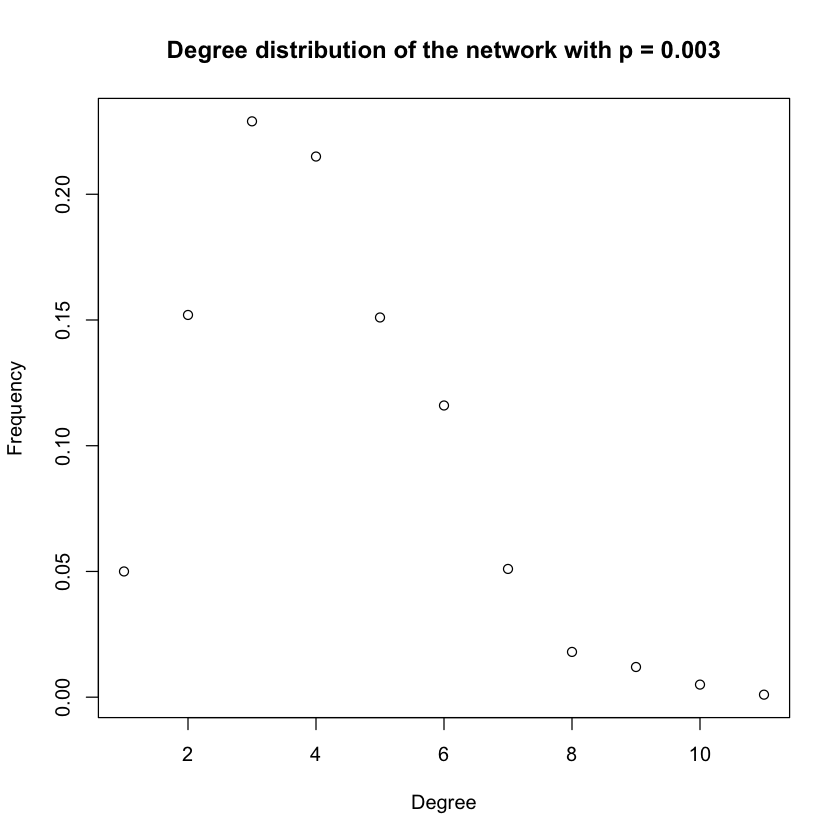

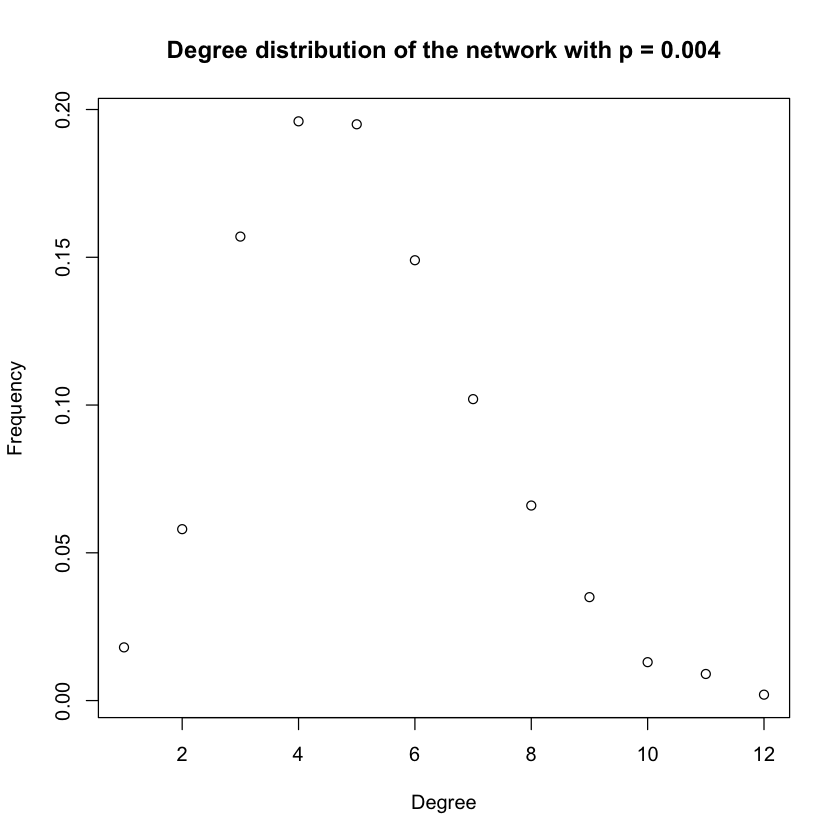

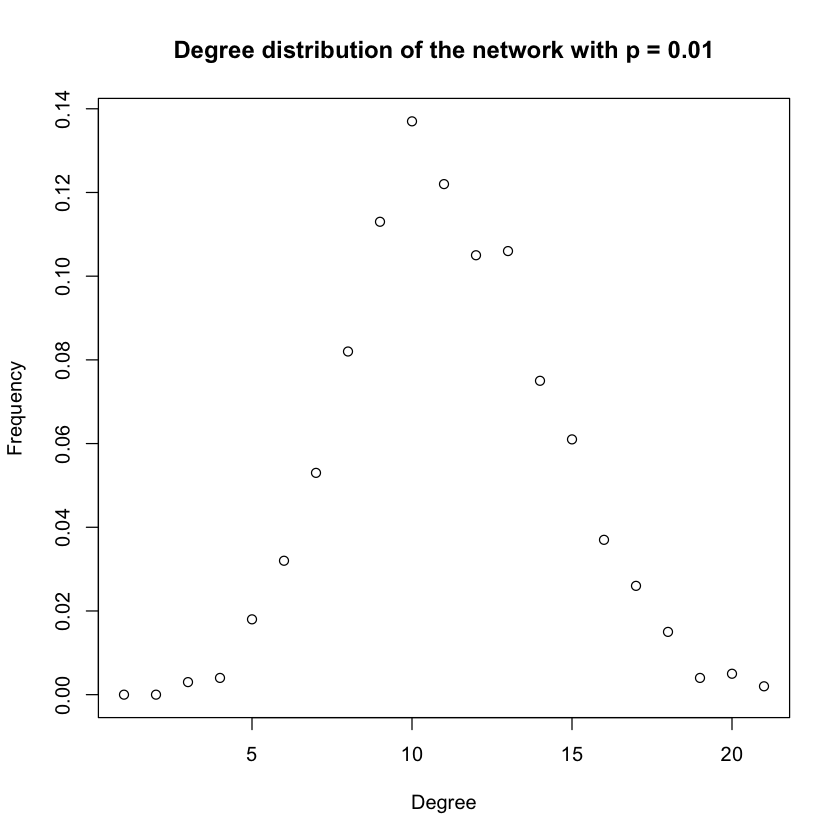

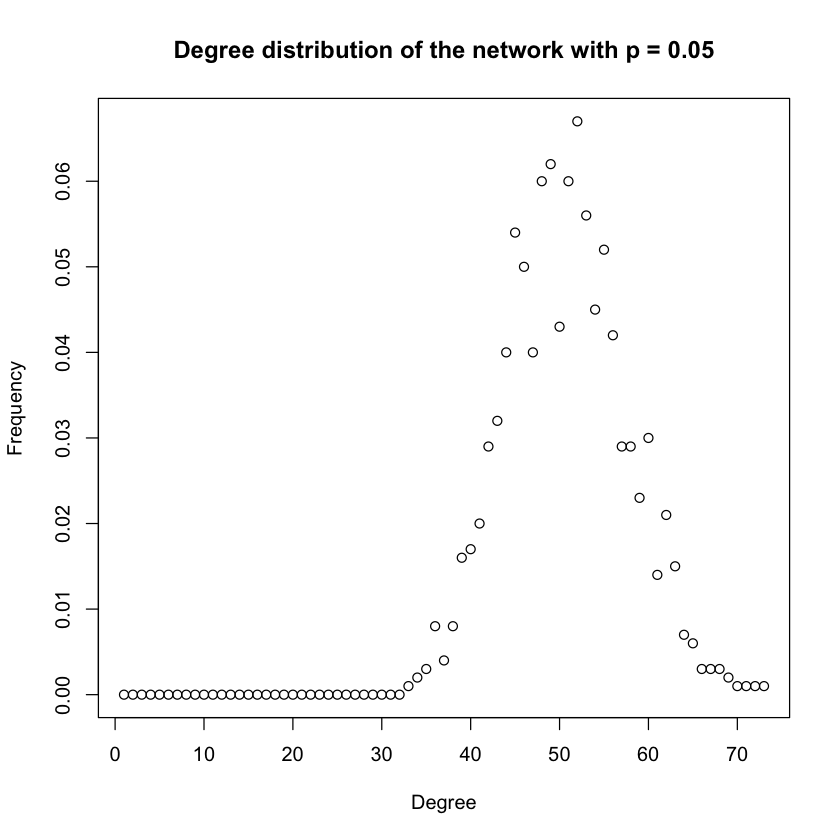

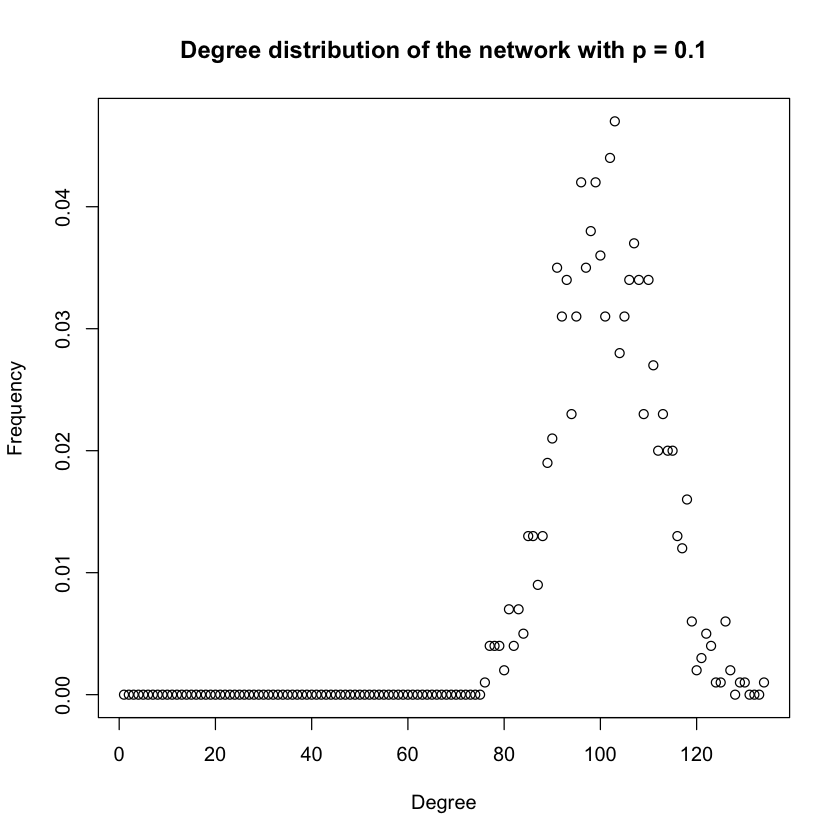

In [5]:
plot(degree.distribution(g1),main="Degree distribution of the network with p = 0.003",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g2),main="Degree distribution of the network with p = 0.004",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g3),main="Degree distribution of the network with p = 0.01",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g4),main="Degree distribution of the network with p = 0.05",xlab="Degree",ylab="Frequency")
plot(degree.distribution(g5),main="Degree distribution of the network with p = 0.1",xlab="Degree",ylab="Frequency")

In [7]:
summary(degree(g1))
var(degree(g1))
summary(degree(g2))
var(degree(g2))
summary(degree(g3))
var(degree(g3))
summary(degree(g4))
var(degree(g4))
summary(degree(g5))
var(degree(g5))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   2.000   3.000   3.022   4.000  10.000 

[1] 3.180697

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   3.000   4.000   4.068   5.000  11.000 

[1] 4.091467

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    8.00   10.00   10.19   12.00   20.00 

[1] 9.622278

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  32.00   45.00   50.00   49.71   54.00   72.00 

[1] 45.00121

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   75.0    94.0   100.0   100.4   107.0   133.0 

[1] 96.16006

The distributions are like a bell curve but skew to their own average degrees, which are the probability p times the number of nodes, 1000. With higher probability, the graph tends to be more likely to have vertices with more edges. Therefore, for small probability, like p = 0.003, there will be more vertices with 0 edge in the graph than that of p = 0.01. 
The theoretical value of the average degree is equal to the total number of nodes times the probability. 
E(g1) = 1000 * 0.003 = 3, which is approximate equal to the empirical mean, 3.01. 
E(g2) = 1000 * 0.004 = 4, which is approximate equal to the empirical mean, 3.938. 
E(g3) = 1000 * 0.01 = 10, which is approximate equal to the empirical mean, 10.13. 
E(g4) = 1000 * 0.05 = 50, which is approximate equal to the empirical mean, 49.85. 
E(g5) = 1000 * 0.1 = 100, which is approximate equal to the empirical mean, 99.49. 